# Correlation of the global happiness index and world GDP using Pandas for year 2021 

<p>The study of <b>'Happiness'</b> is a recurring theme in Philosophy, my academic discipline of provenance. The discipline has given me ideas (frameworks) and ways to think about these ideas (methodologies) that have helped me clarify the issue of happiness on a personal level. That being said, I fully support Aristotle's vision of happiness as <b><i>'human flourishing'</i></b>. What this means not only in my day-to-day, but also in the day-to-day of the other 9 trillion+ inhabitants of our planet, leaves ample room for discussion and debate.</p><img src="https://sdxl-h-p-8.stablediffusionweb.com/file=/tmp/gradio/fd3d7333a7fb9ea1073a72cbb8c3a6d11a21edcc/image.png" width="300" height="200"></p>   

<p>But the <a href="https://worldhappiness.report/">World Happiness Report</a>, published annually by the United Nations, includes in-depth analyses of the real-world factors influencing happiness, including the relationship between GDP and happiness. Their website provides access to the latest reports, research papers, and analyses in the field of happiness and well-being.</p>

<p>For this Data Science project, we shall find out how--and to what significant extent--GDP-relevant data influence the global experience of happiness. 

## 1. Loading data and data analysis framework

### Instantiating Pandas, a powerful Python-based library that we shall be leveraging to perform data transformation and analysis

In [148]:
#Access Python data analysis library
import pandas as pd

### Accessing the latest published Global GDP data by the World Economic Forum from [this site](https://ourworldindata.org/grapher/national-gdp-constant-usd-wb?tab=table) 

In [149]:
#Load the relevant data set into a Pandas DataFrame
gdp = pd.read_csv('national-gdp-constant-usd-wb.csv')
print(gdp.head())

        Entity Code  Year  GDP (constant 2015 US$)
0  Afghanistan  AFG  2002               7555185000
1  Afghanistan  AFG  2003               8222480400
2  Afghanistan  AFG  2004               8338755600
3  Afghanistan  AFG  2005               9275174000
4  Afghanistan  AFG  2006               9772083000


### Accessing our second data set containing data on the world happiness index for the year 2021 which was sourced from [this site](https://data.world/makeovermonday/2020w19-world-happiness-report-2020/workspace/file?filename=WHR20_DataForFigure2.1.xls)

In [150]:
# Loading our relevant happiness index 2021 data set as a Pandas DataFrame
# Getting a glimpse of the first few rows
happiness_2021 = pd.read_csv('happiness_2021.csv')
happiness_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [151]:
happiness_2021.info()

happiness_2021.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

(153, 20)

In [152]:
happiness_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

### The DataSet contains plenty of variable features. However, we are only going to use data values under the columns 'Country name', 'Regional indicator', Ladder score', and 'Logged GDP per capita', 'Healthy life expectancy', and 'Generosity'. Our new DataFrame will be called 'new_happiness_2021.' 

In [153]:
# Using a function to subset 'happiness_2021' DataFrame
# to only include the three columns: 'Country name', 'Regional indicator',
# Ladder score', and 'Logged GDP per capita',
# 'Healthy life expectancy' and 'Generosity'

def shrink_dataframe(df):
    # Selecting the desired columns
    selected_columns = ['Country name', 'Regional indicator',
                        'Ladder score', 'Logged GDP per capita', 'Healthy life expectancy' and 'Generosity']
    
    # Creating a new DataFrame with only the selected columns
    new_df = df[selected_columns].copy()
    
    return new_df

# With 'happiness_2021' as the original DataFrame,
# we would call the function like this:

new_happiness_2021 = shrink_dataframe(happiness_2021)

In [154]:
# Taking a look at the first few observations of our new DataFrame
new_happiness_2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Generosity
0,Finland,Western Europe,7.8087,10.639267,-0.059482
1,Denmark,Western Europe,7.6456,10.774001,0.066202
2,Switzerland,Western Europe,7.5599,10.979933,0.105911
3,Iceland,Western Europe,7.5045,10.772559,0.246944
4,Norway,Western Europe,7.4880,11.087804,0.134533


### We'll replace some column names with simpler variable names which are comparable to the column variable names of our first DataFrame 'gdp'

In [155]:
# Using a Python function to replace the column variable names 'Country name', 'Ladder score', and 
# 'Logged GDP per capita' of our downsized DataFrame called 'new_happiness_2021' with the new column variable 
# names 'Country', 'Happiness ranking', and 'GDP 2021' respectively. 
def rename_columns(df):
    # Dictionary to map old column names to new column names
    column_mapping = {
        'Country name': 'Country',
        'Ladder score': 'Happiness ranking',
        'Logged GDP per capita': 'GDP 2021'
    }
    
    # Rename the columns using the dictionary
    df.rename(columns=column_mapping, inplace=True)

# Calling the function
rename_columns(new_happiness_2021)

In [156]:
new_happiness_2021.head()

,Country,Regional indicator,Happiness ranking,GDP 2021,Generosity
0,Finland,Western Europe,7.8087,10.639267,-0.059482
1,Denmark,Western Europe,7.6456,10.774001,0.066202
2,Switzerland,Western Europe,7.5599,10.979933,0.105911
3,Iceland,Western Europe,7.5045,10.772559,0.246944
4,Norway,Western Europe,7.4880,11.087804,0.134533


## 2. Exploratory data analysis

Now that the data are loaded into DataFrames, we shall first lightly explore the data to determine their salient characteristics (i.e. the values, column headings, and indices). This would also give us a preview of the distribution of the data.

## 'gdp' DataFrame

In [157]:
#Finding out the number of rows and columns
gdp.shape

(10669, 4)

In [158]:
#Finding out out the column variable names
gdp.columns

Index(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$)'], dtype='object')

In [159]:
# Getting some fundamental statistics about our dataset
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10669 entries, 0 to 10668
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   10669 non-null  object
 1   Code                     9890 non-null   object
 2   Year                     10669 non-null  int64 
 3   GDP (constant 2015 US$)  10669 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 333.5+ KB


To optimize our analysis of Global GDP data 2021, we have to find out if there are missing values (and to what extent). We improve our chances of attaining clear, accurate, and comprehensive results in our analysis when we determine that our relevant data is sufficient to begin with.

In [160]:
# Checking for missing values
gdp.isna().head()

,Entity,Code,Year,GDP (constant 2015 US$)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [161]:
# Getting a tally of possible missing values for each row
# We find out that under the column 'Code' there are 779 missing values
gdp.isna().sum()

Entity                       0
Code                       779
Year                         0
GDP (constant 2015 US$)      0
dtype: int64

There are 779 empty or missing field values under the column 'Code.' Since we've had a glimpse of the first available rows of the dataframe at the outset, it stands to reason that these missing values are negligible. That is, the column 'Entity' has 0 missing values, and its field values are equivalent to the values under the neighboring column 'Code' (i.e. the former contains names of countries/nations of the world, while the latter corresponds to the respective abbreviations). 

Using the same 'gdp' DataFrame, we'll replace the column name 'GDP (constant 2015 US )' with simpler variable 'GDP'.

In [162]:
# Using a Python function to replace the column name 'GDP (constant 2015 US$)' of our DataFrame called 'gdp' 
# with the new column variable "GDP". 
def rename_columns(df):
    # Dictionary to map old column name to new column name
    column_mapping = {
        'GDP (constant 2015 US$)': 'GDP',
    }
    
    # Rename the columns using the dictionary
    df.rename(columns=column_mapping, inplace=True)

# Calling the function
rename_columns(gdp)

In [163]:
gdp.head()

,Entity,Code,Year,GDP
0,Afghanistan,AFG,2002,7555185000
1,Afghanistan,AFG,2003,8222480400
2,Afghanistan,AFG,2004,8338755600
3,Afghanistan,AFG,2005,9275174000
4,Afghanistan,AFG,2006,9772083000


## new_happiness_2021 DataFrame

In [164]:
#Finding out the number of rows and columns
new_happiness_2021.shape

(153, 5)

In [165]:
#Finding out out the column variable names
new_happiness_2021.columns

Index(['Country', 'Regional indicator', 'Happiness ranking', 'GDP 2021',
       'Generosity'],
      dtype='object')

In [166]:
# Getting some fundamental statistics about our dataset
new_happiness_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             153 non-null    object 
 1   Regional indicator  153 non-null    object 
 2   Happiness ranking   153 non-null    float64
 3   GDP 2021            153 non-null    float64
 4   Generosity          153 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.1+ KB


To optimize our analysis of the World Happiness Score 2021, we have to find out if there are missing values (and to what extent). We improve our chances of attaining clear, accurate, and comprehensive results in our analysis when we determine that our relevant data is sufficient to begin with.

In [167]:
# Checking for missing values
new_happiness_2021.isna().head()

,Country,Regional indicator,Happiness ranking,GDP 2021,Generosity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [168]:
# Getting a tally of possible missing values for each row
# We find out that under the column 'Code' there are 779 missing values
new_happiness_2021.isna().sum()

Country               0
Regional indicator    0
Happiness ranking     0
GDP 2021              0
Generosity            0
dtype: int64

We have a tidy new_happiness_2021 DataFrame, and this makes it perfect for further data processing and analysis.

## 3. Univariate statistical analysis

### A. Determining GDP trends across the years

Let's first find out the **_years_** covered by our data and proceed from there. 

In [169]:
# Determining the range of years under the 'Year' column using a function
def get_year_range(data_frame, year_column):
    min_year = data_frame[year_column].min()
    max_year = data_frame[year_column].max()
    return min_year, max_year

# Calling the function to get the range of years
min_year, max_year = get_year_range(gdp, 'Year')

print(f'The range of years is from {min_year} to {max_year}')

The range of years is from 1960 to 2021


We can visually explore the relationship between 'Year' and 'GDP' by creating a bar plot. That being said, we will deploy a handy data visualization tool, matplotlib.

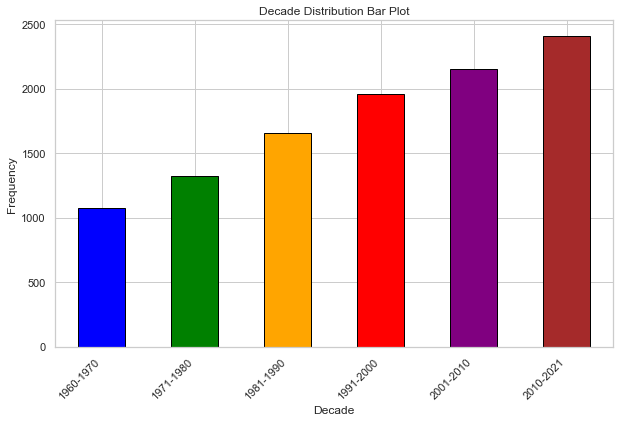

In [170]:
import matplotlib.pyplot as plt

# Using the same DataFrame 'gdp' with 'Year' column, we will aggregate the values into decades to prepare
# for a more compact plot
gdp['Decade'] = pd.cut(gdp['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2021], labels=['1960-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2010-2021'])

# Counting the number of occurrences for each decade
decade_counts = gdp['Decade'].value_counts().sort_index()

# Defining colors for each decade
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

# Creating a bar plot with different colors
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.title('Decade Distribution Bar Plot')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()

Let us generate fundamental measures of central tendency (i.e. mean, median, and standard deviation). In this regard, we use numPy and the relevant functions from this library.

In [171]:
import pandas as pd

# Using the 'gdp' with 'Year', 'Decade', and 'GDP (constant 2015 US$)' columns
gdp['Decade'] = pd.cut(gdp['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2021], labels=['1960-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2010-2021'])

# Calculate mean, median, and standard deviation for 'GDP (constant 2015 US$)'
mean_gdp = gdp['GDP'].mean()
min_gdp = gdp['GDP'].min()
max_gdp = gdp['GDP'].max()
median_gdp = gdp['GDP'].median()
std_gdp = gdp['GDP'].std()

print(f"Mean GDP: {mean_gdp}")
print(f"Minimum GDP: {min_gdp}")
print(f"Maximum GDP: {max_gdp}")
print(f"Median GDP: {median_gdp}")
print(f"Standard Deviation of GDP: {std_gdp}")

Mean GDP: 1042818672277.4669
Minimum GDP: 21561952
Maximum GDP: 86852660000000
Median GDP: 20351154000.0
Standard Deviation of GDP: 4918907982561.434


We can calculate the correlation between 'Year' and 'GDP' then determine the strength of the correlation. 

In [172]:
import pandas as pd

# Using 'gdp' DataFrame with 'Year', 'Decade', and 'GDP' columns
gdp['Decade'] = pd.cut(gdp['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2021], labels=['1960-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2010-2021'])

# Calculating the mean 'GDP' for each 'Decade'
mean_gdp_by_decade = gdp.groupby('Decade')['GDP'].mean().reset_index()

# Calculating correlation between 'Decade' and 'GDP'
correlation = mean_gdp_by_decade.corr(numeric_only=True).iloc[0, 0]

print(f"Correlation between 'Decade' and 'GDP': {correlation}")

Correlation between 'Decade' and 'GDP': 1.0


Based on the result, the global 2021 GDP values and variable time (expressed as 'Year' grouped as 'Decade') are not only correlated, but the **values under 'Decade' and 'GDP' have a causal relationship**. 

### B. Examining distribution of happiness scores across regions

To get information on the breakdown of countries per region, we can aggregate them into regional groups and sort the results.

In [173]:
# Aggregating countries into groups in terms of their regional indicator and sorting the results
regional_counts = new_happiness_2021.groupby('Regional indicator').size().sort_values(ascending=False)

# Printing the sorted values
print(regional_counts)

Regional indicator
Sub-Saharan Africa                    39
Latin America and Caribbean           21
Western Europe                        21
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
dtype: int64


We can easily imagine the composition through a pie chart:

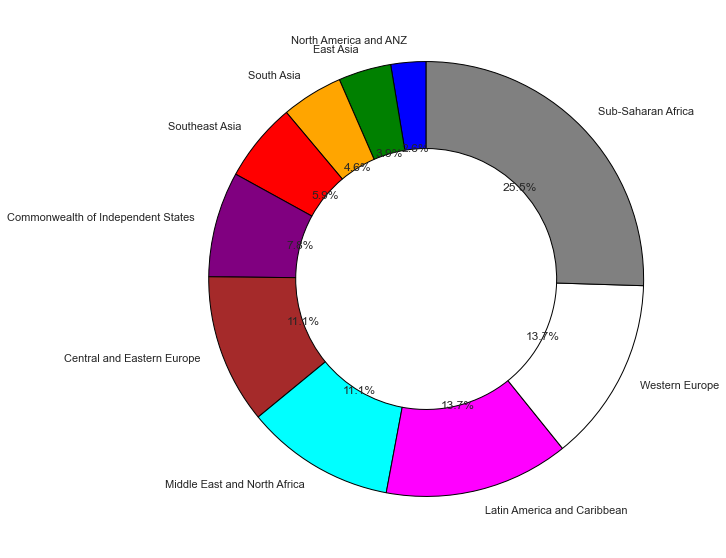

In [174]:
# Passing the results of aggregating and sorting data using groupby and size operations to a variable
regional_counts = new_happiness_2021.groupby('Regional indicator').size().sort_values()

# Defining colors for each regional indicator
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'cyan', 'magenta', 'white', 'gray']

# Creating a pie chart with a black outline
plt.figure(figsize=(10, 10))
plt.pie(regional_counts, labels=regional_counts.index, colors=colors, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='black'))
plt.show()

...or a bar plot:

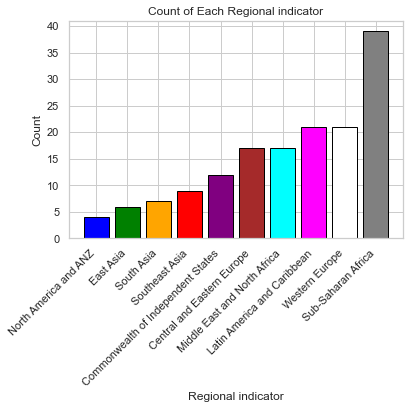

In [175]:
import matplotlib.pyplot as plt

# Assuming you have already executed the groupby and size operations
regional_counts = new_happiness_2021.groupby('Regional indicator').size().sort_values()

# Defining colors for each decade
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'cyan', 'magenta', 'white', 'gray']

# Create a bar plot
plt.bar(regional_counts.index, regional_counts, color=colors, edgecolor='black')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Regional indicator')
plt.ylabel('Count')
plt.title('Count of Each Regional indicator')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()

**_What percentage of each regional group consists of the happiest countries?_** We can find out by first retrieving relevant descriptive statistics of our 'new_happiness_2021' dataframe.

In [176]:
print(new_happiness_2021['Happiness ranking'].describe())

count    153.00000
mean       5.47324
std        1.11227
min        2.56690
25%        4.72410
50%        5.51500
75%        6.22850
max        7.80870
Name: Happiness ranking, dtype: float64


Based on the measures of central tendency, we can peg a **threshold for very happy countries** close to the mean, rounded to the nearest ten **i.e. 5**.

Let us further add nuance to our analysis by using a data visualization tool built on top matplotlib called seaborn. 

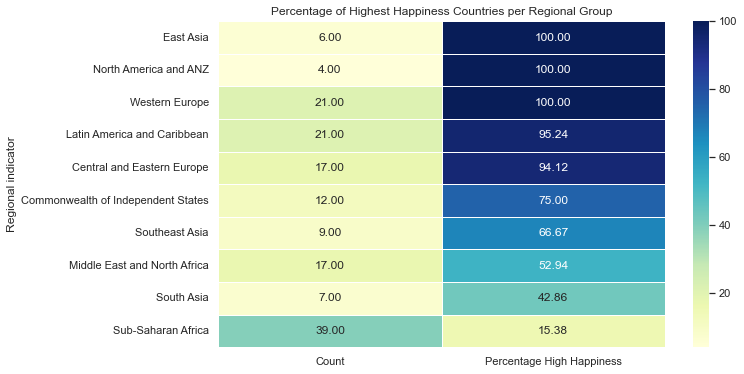

In [177]:
import seaborn as sns

# Assuming 'new_happiness_2021' is your DataFrame
# You may need to replace 'Happiness ranking' with the actual column name representing the happiness ranking

threshold = 5

# Group by 'Regional indicator' and calculate count and percentage of countries with ranking >= threshold
grouped_data = new_happiness_2021.groupby('Regional indicator')['Happiness ranking'].agg(['count', lambda x: (x >= threshold).mean() * 100])

# Rename the columns for clarity
grouped_data.columns = ['Count', 'Percentage High Happiness']

# Sort the DataFrame by 'Percentage High Happiness' in descending order
grouped_data = grouped_data.sort_values(by='Percentage High Happiness', ascending=False)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Percentage of Highest Happiness Countries per Regional Group')
plt.show()

Among the ten regions in our dataframe, it is the **Sub-Saharn African region that is composed of the most countries with the lowest percentage of happiness rankings (about 15%)** compared to the rest of the nine (9) other regions in our data. 

## 2. Multivariate statistical analysis

###A. The relationship 